### Simple Linear Regression

Problem Statement

A Grounp of Researchers conducted a study with a aim of predicting Abdominal AT Area using Simple anthropometric measurements i.e measurements on the human body

The Waist Circumference - Adipose Tissue data is a part of this study wherein its the aim is to how well waist Circumference (WC) predict the AT Area

In [1]:
#Loading the Required Libaries
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/WC_AT.csv")
Dataset.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


--> As we need to predict AT Area in this Case So,

--> Y is AT (Dependent)
--> X is Waist  (Independent)

--> AT~Waist

#### Correlation

In [3]:
#Using corr()
Dataset.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


Inference: 

As it can be seen Correlation between Waist and AT is 0.81 which indicates Positively Strong Relation.

Also this prove Waist is required to Predict AT Area

#### Plotting -- Distribution

<AxesSubplot:xlabel='Waist', ylabel='Density'>

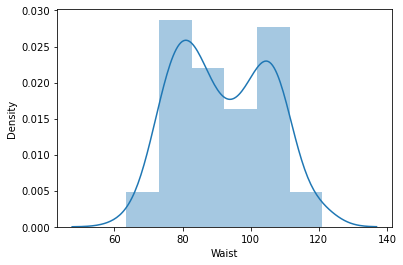

In [4]:
#Distribution Plot for Waist feature
sns.distplot(Dataset.Waist)

<AxesSubplot:xlabel='AT', ylabel='Density'>

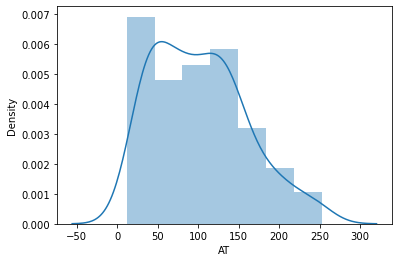

In [5]:
#Distribution Plot for AT feature
sns.distplot(Dataset.AT)

Inference:

Waist, AT: Distribution is not normal for both the features, it also seems to be Bimodel, and has positive skewness

#### Model Building --Fitting a Linear Regression model

In [6]:
#Building the model
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = Dataset).fit()

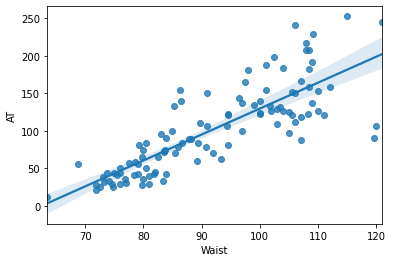

In [7]:
#Best Fit line
sns.regplot(x="Waist", y="AT", data=Dataset);

In [8]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

Inference: Intercept is B0 = -215, Waist is B1 = 3.45

In [9]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept    -9.909103
Waist        14.740376
dtype: float64 
 P_values is:  
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


#### Hypothesis in SLR

B0 = Beta0 , B1 = Beta1

H0: B1 = 0, B1--> Slope is Zero Y is not Dependent

H1: B1 ≠ 0, B1--> Slope is not Zero Y is Dependent

In [10]:
#Hypothesis Test of SLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and Y is Dependent")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and Y is not Dependent")

p_value is: 1.6186065693841093e-27 , Reject H0,Slope is not Zero and Y is Dependent


In [11]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

Inference: R_squared is 0.67 so the model is a okay Good model

#### Predict for new data point

In [12]:
#Predict for 200 and 300 daily circulation
newdata=pd.DataFrame(np.array([98,85]),columns = ["Waist"])
newdata

,Waist
0,98
1,85


In [13]:
#Predicting 
model.predict(newdata)

0    122.986732
1     78.021560
dtype: float64

Inference: 

For 98 Waist Size, AT area will be 122

For 85 Waist Size, AT area will be 78

#### Manually  Calculating and Checking the regression equation of the model

In [14]:
# Y = B0 + B1X

#B0 = -215.98 - from Build model
#B1 = 3.45  - from Build model
#X = 85    - Datapoint to Predict

Y = -215.98 +3.45*85
Y

77.27000000000001

Inference:

Manually Also Its gives approx the Same results as the Regression equation built by the Model